## Data from MovieSummaries

First test run on the dataset to try to evaluate if there is enough data to do the following data analysis.

Within the horror theme, study o the evolution of :
- diversity (etudier l'ethnie des perso principal, )
- economic succes (box office)
- Evolution de la narrative 
- influence des plateforme de streaming sur l'industrie 
- 



In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import json


#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats
#from helpers import find_duplicates



LOAD THE DATA


In [31]:
#https://github.com/Stefanstud/CS401-movies-analysis/blob/main/milestone_3.ipynb


DATA_FOLDER = 'MovieSummaries/'

CHARACTER_DATASET = DATA_FOLDER+"character.metadata.tsv"
MOVIE_DATASET = DATA_FOLDER+"movie.metadata.tsv"
NAME_DATASET = DATA_FOLDER+"name.clusters.txt"
SUMMARIES_DATASET = DATA_FOLDER+"plot_summaries.txt"
TROPES_DATASET = DATA_FOLDER+"tvtropes.clusters.txt"


df_charact=pd.read_csv(CHARACTER_DATASET, sep='\t', names=['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character Name', 'Actor DOB', 'Actor gender', 'Actor height', 'Actor ethnicity', 'Actor Name', 'Actor age at movie release', 'Freebase character map1', 'Freebase character map2', 'Freebase character map3'])
df_charact

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor Name,Actor age at movie release,Freebase character map1,Freebase character map2,Freebase character map3
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


Let's start by exploring the succes of the movies 

In [32]:
df_movie = pd.read_csv(MOVIE_DATASET, sep='\t', names=['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genre'])
df_movie

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [4]:
df_name = pd.read_csv(NAME_DATASET, sep='\t', names=['Character Name', 'Freebase character map'])
df_name

,Character Name,Freebase character map
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn
...,...,...
2661,John Rolfe,/m/0k5_ql
2662,John Rolfe,/m/02vd6vs
2663,Elizabeth Swann,/m/0k1xvz
2664,Elizabeth Swann,/m/0k1x_d


In [5]:
df_tropes=pd.read_csv(TROPES_DATASET,sep='\t', header=None, names=['Tropes', 'Characters'])
df_tropes

,Tropes,Characters
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."
...,...,...
496,young_gun,"{""char"": ""Morgan Earp"", ""movie"": ""Tombstone"", ..."
497,young_gun,"{""char"": ""Colorado Ryan"", ""movie"": ""Rio Bravo""..."
498,young_gun,"{""char"": ""Tom Sawyer"", ""movie"": ""The League of..."
499,young_gun,"{""char"": ""William H. 'Billy the Kid' Bonney"", ..."


In [30]:
df_summaries=pd.read_csv(SUMMARIES_DATASET,sep='\t', names=['Wikipedia movie ID', 'Summary'])
df_summaries

,Wikipedia movie ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


## Filtering the data to only use the horror genre


In [34]:
##################
# We wan to create a HORROR DATA FRAME
##################


# Creation of a function that parses the json "main genre" variables
def parse_genres(genre_string):
    try:
        return json.loads(genre_string.replace("'", "\""))
    except json.JSONDecodeError:
        return {}

# apply the function to the 'genres' column
df_movie['genres_dict'] = df_movie['Movie genre'].apply(parse_genres)

# extract the list of genre names
df_movie['genre_names'] = df_movie['genres_dict'].apply(lambda x: list(x.values()) if isinstance(x, dict) else [])

# to get a unique list of genres from the entire DataFrame
unique_genres = set()
df_movie['genre_names'].apply(unique_genres.update)
unique_genres_list = list(unique_genres) # convert the set to a list to have a list of unique genres
unique_genres_list

# From this list, we can find the name of the genre that are linked to the horror genre, that will be called the subgenre 
horror_subgenre=['Comedy horror', 'Road-Horror', 'Horror', 'Period Horror', 'Psychological horror', 'Costume Horror', 'Sci-Fi Horror', 'Horror Comedy','Natural horror films']

# Creation of a filtered data frame that contains only horror-subgenre or horror genre
df_movie_horror = df_movie.copy(deep=True)
df_movie_horror['genre_names'] = df_movie['genre_names'].apply(lambda genres: [genre for genre in genres if genre in horror_subgenre])

# remove the movies that are not in these genres
df_movie_horror = df_movie_horror[df_movie_horror['genre_names'].astype(bool)]


# Length of the data frames 
print(f'The original size of the dataframe is {len(df_movie)} and the filetred on is {len(df_movie_horror)}')

print(f'The original size of the dataframe is {100*len(df_movie_horror)/len(df_movie)}')

The original size of the dataframe is 81741 and the filetred on is 5298
The original size of the dataframe is 6.481447498807208


In [8]:
print(f"This is an idea of the cross over of the subgenre of horror movies adn their count in the horror data frame: ")
df_movie_horror.genre_names.value_counts()

This is an idea of the cross over of the subgenre of horror movies adn their count in the horror data frame: 


genre_names
[Horror]                                         4668
[Horror, Horror Comedy]                           172
[Natural horror films, Horror]                    139
[Horror, Sci-Fi Horror]                            71
[Horror, Costume Horror]                           53
[Sci-Fi Horror, Horror]                            42
[Horror Comedy, Horror]                            25
[Horror, Road-Horror]                              17
[Horror Comedy]                                    14
[Comedy horror, Horror]                            14
[Horror, Natural horror films]                     10
[Natural horror films, Horror, Sci-Fi Horror]      10
[Horror, Sci-Fi Horror, Horror Comedy]              9
[Natural horror films, Horror, Horror Comedy]       9
[Comedy horror]                                     8
[Sci-Fi Horror]                                     5
[Horror, Psychological horror]                      5
[Horror, Comedy horror]                             4
[Road-Horror]   

In [9]:
# Transforming the date of realease to keep only the year
df_movie_horror["Movie release year"] = df_movie_horror["Movie release date"].str[:4]
df_movie_horror

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genre,genres_dict,genre_names,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",[Horror],2001
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur...","{'/m/03npn': 'Horror', '/m/0fdjb': 'Supernatur...",[Horror],1960
33,27611999,/m/04j284s,Special Effects,1984,NaN,93.0,{},"{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...","{'/m/01jfsb': 'Thriller', '/m/03npn': 'Horror'...",[Horror],1984
72,20334086,/m/04zyc0t,Vipers,2008-09-21,NaN,89.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/03npn"": ""Horror"", ""/m/015w9s"": ""Televisio...","{'/m/03npn': 'Horror', '/m/015w9s': 'Televisio...",[Horror],2008
77,1254263,/m/04mhwd,Shivers,1975-10-10,NaN,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""H...","{'/m/06n90': 'Science Fiction', '/m/03npn': 'H...","[Horror, Sci-Fi Horror]",1975
...,...,...,...,...,...,...,...,...,...,...,...,...
81660,30748966,/m/0gfgs5h,Haunted,2011-05-06,NaN,143.0,"{""/m/03k50"": ""Hindi Language"", ""/m/02h40lc"": ""...","{""/m/03rk0"": ""India""}","{""/m/01jfsb"": ""Thriller"", ""/m/02n4kr"": ""Myster...","{'/m/01jfsb': 'Thriller', '/m/02n4kr': 'Myster...",[Horror],2011
81707,30863646,/m/05hlhc,Mondo Cane,1962,NaN,108.0,"{""/m/02bjrlw"": ""Italian Language""}","{""/m/03rjj"": ""Italy""}","{""/m/0hj3n07"": ""Culture & Society"", ""/m/03npn""...","{'/m/0hj3n07': 'Culture & Society', '/m/03npn'...",[Horror],1962
81722,26044505,/m/0b6m67n,The Flying Serpent,1946,NaN,59.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0qdzd"": ""B-movie...","{'/m/01jfsb': 'Thriller', '/m/0qdzd': 'B-movie...",[Horror],1946
81728,3868432,/m/0b44p5,Into the Mirror,2003-08-14,NaN,113.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/03npn"": ""Horror""}",{'/m/03npn': 'Horror'},[Horror],2003


# General study

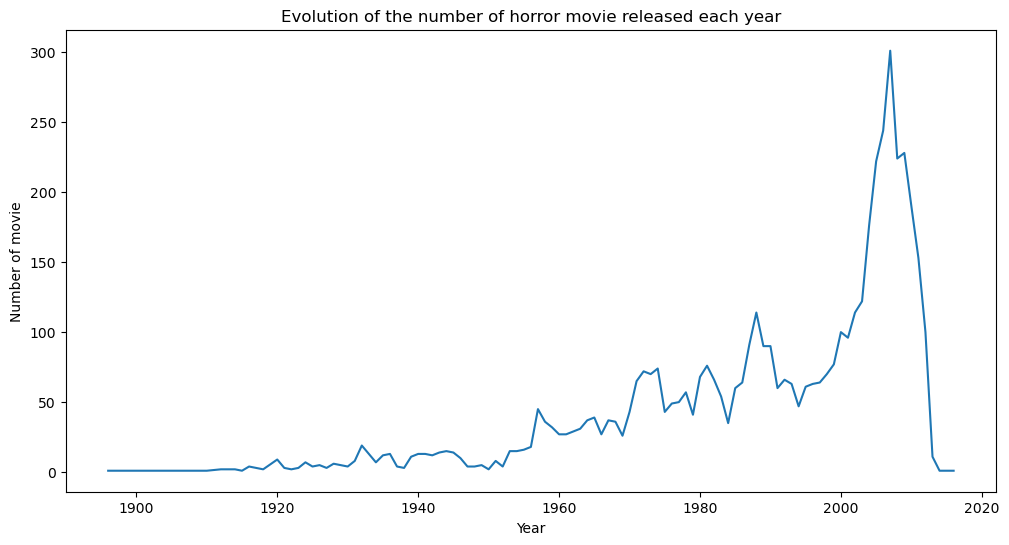

In [10]:
# Distribution of horror movie over time

total_count = df_movie_horror.groupby(pd.to_datetime(df_movie_horror["Movie release year"])).size()

plt.figure(figsize=(12, 6))
plt.plot(total_count.index, total_count.values)
plt.title("Evolution of the number of horror movie released each year")
plt.xlabel("Year")
plt.ylabel("Number of movie")
plt.show()

## Runtime

In [11]:
# Clean the column "Movie runtime" by droping NaN value
df_movie_horror_runtime=df_movie_horror.dropna(subset="Movie runtime").copy(deep=True)
print(f'The length of the horror data frame is {len(df_movie_horror)} while \nthe length of the NaN filtered over runtime dataframe {len(df_movie_horror_runtime)}')


The length of the horror data frame is 5298 while 
the length of the NaN filtered over runtime dataframe 4751


Text(0, 0.5, 'Count')

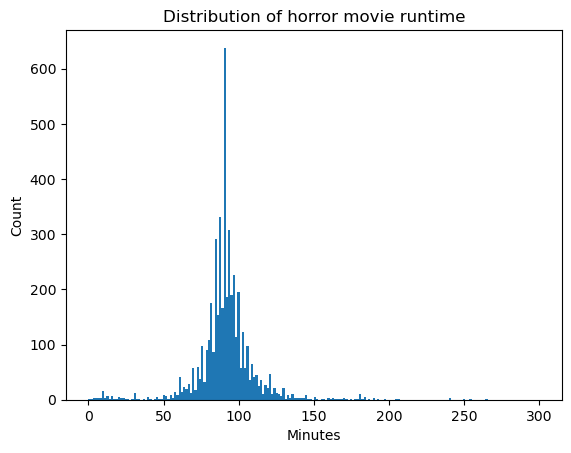

In [12]:
# Histogram of the movie runtime
plt.hist(df_movie_horror_runtime["Movie runtime"], bins=200, range = [0,300])
plt.title("Distribution of horror movie runtime")
plt.xlabel("Minutes")
plt.ylabel("Count")


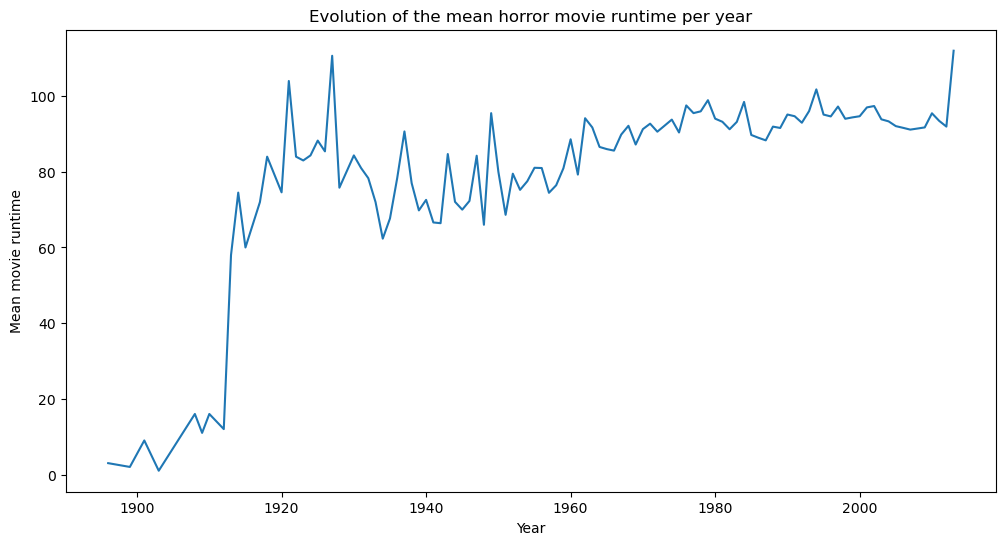

In [13]:
# Evolution of the mean runtime over time

mean_runtime = df_movie_horror_runtime.groupby(pd.to_datetime(df_movie_horror_runtime["Movie release year"]))[["Movie runtime"]].mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_runtime.index, mean_runtime["Movie runtime"])
plt.title("Evolution of the mean horror movie runtime per year")
plt.xlabel("Year")
plt.ylabel("Mean movie runtime")
plt.show()



## Box Office

In [14]:
# Clean the column "Movie box office revenue" by removing the NaN
df_movie_horror_revenue=df_movie_horror.dropna(subset="Movie box office revenue").copy(deep=True)
print(f'The length of the horror data frame is {len(df_movie_horror)} while \nthe length of the NaN filtered over revenu dataframe {len(df_movie_horror_revenue)}')


The length of the horror data frame is 5298 while 
the length of the NaN filtered over revenu dataframe 779


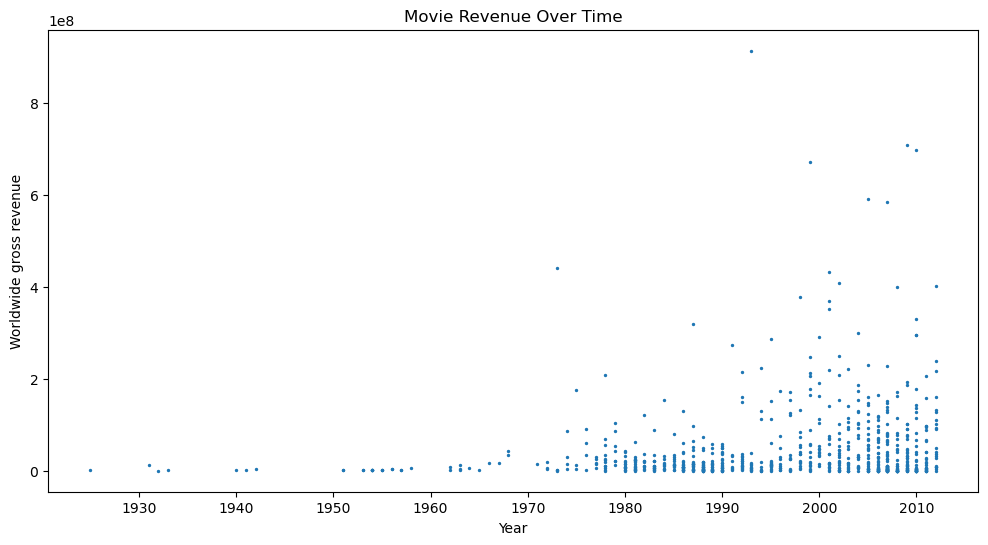

In [15]:
# Evolution of the 

# Ensure "Movie release year" is in datetime format, then sort by this column
df_movie_horror_revenue["Movie release year"] = pd.to_datetime(df_movie_horror_revenue["Movie release year"], errors='coerce', format='%Y')
df_movie_horror_revenue = df_movie_horror_revenue.dropna(subset=["Movie release year"]).sort_values(by="Movie release year")

# Scatter plot of Movie Revenue Over Time
plt.figure(figsize=(12, 6))
plt.scatter(df_movie_horror_revenue["Movie release year"], df_movie_horror_revenue["Movie box office revenue"], s=2)
plt.title("Movie Revenue Over Time")
plt.xlabel("Year")
plt.ylabel("Worldwide gross revenue")
plt.show()


Text(0, 0.5, 'Mean movie revenue')

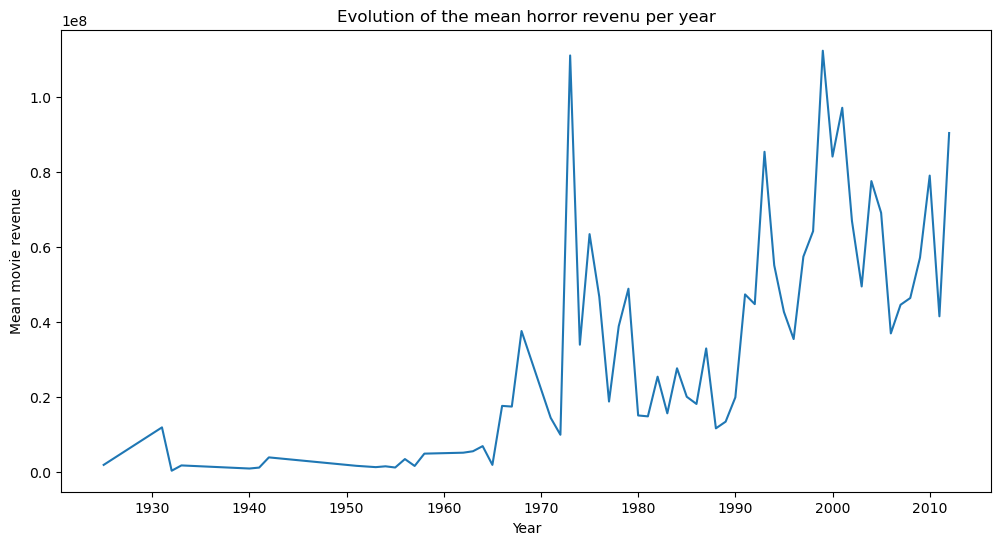

In [16]:
# Evolution of the mean box office revenu per year

mean_revenue = df_movie_horror_revenue.groupby(pd.to_datetime(df_movie_horror_revenue["Movie release year"]))[["Movie box office revenue"]].mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_revenue.index, mean_revenue["Movie box office revenue"])
plt.title("Evolution of the mean horror revenu per year")
plt.xlabel("Year")
plt.ylabel("Mean movie revenue")

## Study of country



In [17]:
df_movie_horror

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genre,genres_dict,genre_names,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",[Horror],2001
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur...","{'/m/03npn': 'Horror', '/m/0fdjb': 'Supernatur...",[Horror],1960
33,27611999,/m/04j284s,Special Effects,1984,NaN,93.0,{},"{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...","{'/m/01jfsb': 'Thriller', '/m/03npn': 'Horror'...",[Horror],1984
72,20334086,/m/04zyc0t,Vipers,2008-09-21,NaN,89.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/03npn"": ""Horror"", ""/m/015w9s"": ""Televisio...","{'/m/03npn': 'Horror', '/m/015w9s': 'Televisio...",[Horror],2008
77,1254263,/m/04mhwd,Shivers,1975-10-10,NaN,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""H...","{'/m/06n90': 'Science Fiction', '/m/03npn': 'H...","[Horror, Sci-Fi Horror]",1975
...,...,...,...,...,...,...,...,...,...,...,...,...
81660,30748966,/m/0gfgs5h,Haunted,2011-05-06,NaN,143.0,"{""/m/03k50"": ""Hindi Language"", ""/m/02h40lc"": ""...","{""/m/03rk0"": ""India""}","{""/m/01jfsb"": ""Thriller"", ""/m/02n4kr"": ""Myster...","{'/m/01jfsb': 'Thriller', '/m/02n4kr': 'Myster...",[Horror],2011
81707,30863646,/m/05hlhc,Mondo Cane,1962,NaN,108.0,"{""/m/02bjrlw"": ""Italian Language""}","{""/m/03rjj"": ""Italy""}","{""/m/0hj3n07"": ""Culture & Society"", ""/m/03npn""...","{'/m/0hj3n07': 'Culture & Society', '/m/03npn'...",[Horror],1962
81722,26044505,/m/0b6m67n,The Flying Serpent,1946,NaN,59.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0qdzd"": ""B-movie...","{'/m/01jfsb': 'Thriller', '/m/0qdzd': 'B-movie...",[Horror],1946
81728,3868432,/m/0b44p5,Into the Mirror,2003-08-14,NaN,113.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/03npn"": ""Horror""}",{'/m/03npn': 'Horror'},[Horror],2003


In [18]:
##################
# We wan to create a HORROR DATA FRAME with the cleaned country column
##################


# Creation of a function that parses the json "country" variables
def parse_country(country_string):
    try:
        return json.loads(country_string.replace("'", "\""))
    except json.JSONDecodeError:
        return {}

# apply the function to the 'genres' column
df_movie_horror['country_dict'] = df_movie_horror['Movie countries'].apply(parse_country)

# extract the list of genre names
df_movie_horror['country'] = df_movie_horror['country_dict'].apply(lambda x: list(x.values()) if isinstance(x, dict) else [])

# to get a unique list of genres from the entire DataFrame
unique_country = set()
df_movie_horror['country'].apply(unique_country.update)
unique_country_list = list(unique_country) # convert the set to a list to have a list of unique genres
unique_country_list

# From this list, we can find the name of the genre that are linked to the horror genre, that will be called the subgenre 
#horror_subgenre=['Comedy horror', 'Road-Horror', 'Horror', 'Period Horror', 'Psychological horror', 'Costume Horror', 'Sci-Fi Horror', 'Horror Comedy','Natural horror films']

['Puerto Rico',
 'India',
 'Iceland',
 'Germany',
 'Georgia',
 'United States of America',
 'Slovak Republic',
 'Cuba',
 'Chile',
 'Egypt',
 'South Korea',
 'Thailand',
 'Canada',
 'Netherlands',
 'United Kingdom',
 'Ukraine',
 'Peru',
 'Hungary',
 'England',
 'Brazil',
 'Finland',
 'Cambodia',
 'West Germany',
 'Luxembourg',
 'Czech Republic',
 'Indonesia',
 'Scotland',
 'Malta',
 'Romania',
 'Austria',
 'Argentina',
 'Israel',
 'Serbia',
 'Colombia',
 'Nepal',
 'Cameroon',
 'Bosnia and Herzegovina',
 'Czechoslovakia',
 'Greece',
 'Hong Kong',
 'Singapore',
 'Spain',
 'United Arab Emirates',
 'Denmark',
 'Mexico',
 'France',
 'Croatia',
 'Iran',
 'Azerbaijan',
 'Turkey',
 'Taiwan',
 'Philippines',
 'China',
 'Russia',
 'Italy',
 'Australia',
 'Wales',
 'Malaysia',
 'New Zealand',
 'Bulgaria',
 'Belgium',
 'Japan',
 'Switzerland',
 'Weimar Republic',
 'Ireland',
 'Morocco',
 'Slovakia',
 'Yugoslavia',
 'Soviet Union',
 'Norway',
 'Sweden',
 'South Africa',
 'Uruguay',
 'Portugal',
 'Po

We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

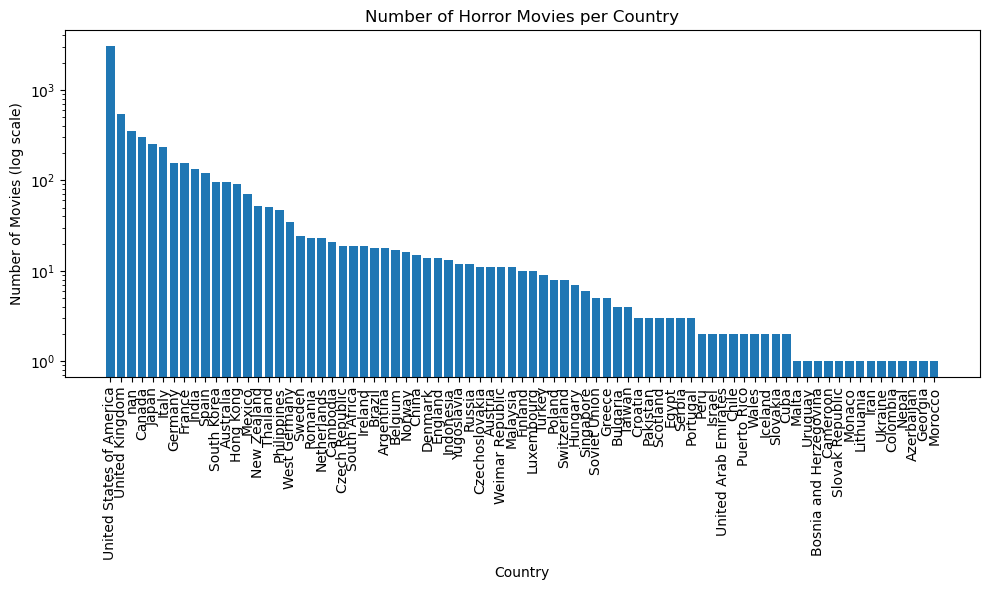

In [19]:
# Histogram of the movie runtime

# Explode and process 'country' column
df_exploded = df_movie_horror.explode('country')
df_exploded['country'] = df_exploded['country'].apply(lambda x: str(x))

# Count the number of movies per country and sort by descending order
country_counts = df_exploded['country'].value_counts().sort_values(ascending=False)

# Plot the sorted histogram with log-scaled y-axis
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(country_counts.index, country_counts.values)
plt.yscale('log')  # Set y-axis to log scale
plt.title('Number of Horror Movies per Country')
plt.xlabel('Country')
plt.ylabel('Number of Movies (log scale)')
plt.xticks(rotation=90)  # Rotate country labels for readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [20]:
##################
# We wan to create a HORROR DATA FRAME with a cleaned langage column
##################


# Creation of a function that parses the json "country" variables
def parse_country(country_string):
    try:
        return json.loads(country_string.replace("'", "\""))
    except json.JSONDecodeError:
        return {}

# apply the function to the 'genres' column
df_movie_horror['language_dict'] = df_movie_horror['Movie languages'].apply(parse_country)

# extract the list of genre names
df_movie_horror['language'] = df_movie_horror['language_dict'].apply(lambda x: list(x.values()) if isinstance(x, dict) else [])

# to get a unique list of genres from the entire DataFrame
unique_language = set()
df_movie_horror['language'].apply(unique_language.update)
unique_language_list = list(unique_language) # convert the set to a list to have a list of unique genres
unique_language_list

['Hebrew Language',
 'Hungarian language',
 'Tibetan languages',
 'Vietnamese Language',
 'Korean Language',
 'Ukrainian Language',
 'Kannada Language',
 'Cantonese',
 'Catalan language',
 'Estonian Language',
 'Chinese, Hakka Language',
 'Danish Language',
 'French Language',
 'Māori language',
 'German Language',
 'Maya, Yucatán Language',
 'Sumerian',
 'Serbian language',
 'Malay Language',
 'Silent film',
 'Dutch Language',
 'Urdu Language',
 'Greek Language',
 'Bulgarian Language',
 'Turkish Language',
 'Latin Language',
 'American Sign Language',
 'Arabic Language',
 'Tamil Language',
 'Luxembourgish language',
 'Taiwanese',
 'Assyrian Neo-Aramaic Language',
 'Korean Sign Language',
 'Slovak Language',
 'Swahili Language',
 'Czech Language',
 'Gaelic',
 'Norwegian Language',
 'Sanskrit Language',
 'Hiligaynon language',
 'Polish Language',
 'Burmese Language',
 'Hokkien',
 'Persian Language',
 'Icelandic Language',
 'Filipino language',
 'Welsh Language',
 'Telugu language',
 'Am

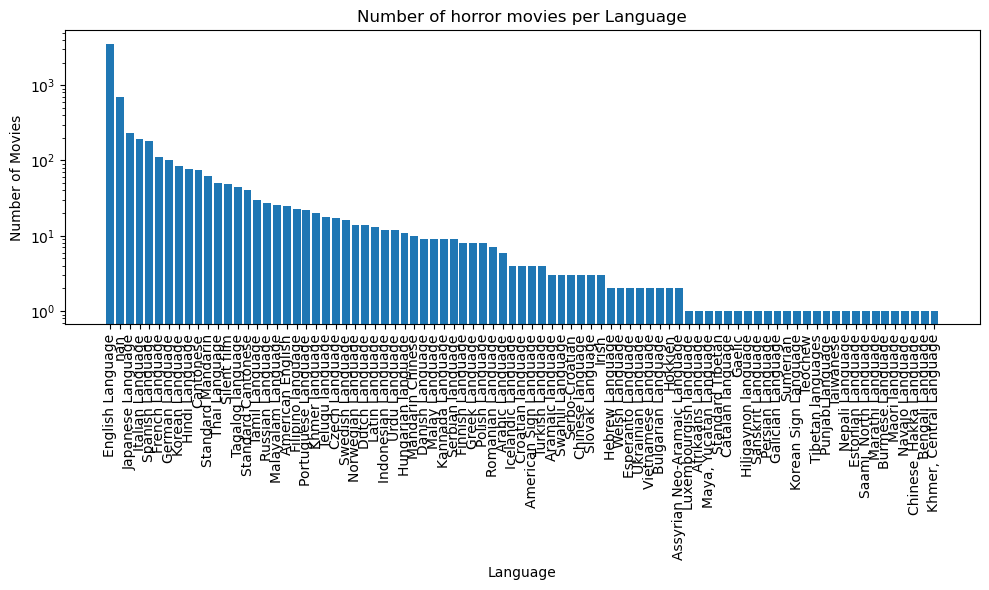

In [21]:
df_exploded_language = df_movie_horror.explode('language')
df_exploded_language['language']=df_exploded_language['language'].apply(lambda x: str(x))

language_counts = df_exploded_language['language'].value_counts().sort_values(ascending=False)

# Plot the histogram
plt.figure(figsize=(10,6))  # Set figure size
plt.bar(language_counts.index, language_counts.values)
plt.yscale('log')
plt.title('Number of horror movies per Language')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate language labels for readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

## CHARACTER DATASET



In [22]:
df_merged = pd.merge(df_charact, df_movie_horror, on=['Wikipedia movie ID', 'Freebase movie ID'], how='inner')
df_merged

,Wikipedia movie ID,Freebase movie ID,Movie release date_x,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor Name,Actor age at movie release,...,Movie languages,Movie countries,Movie genre,genres_dict,genre_names,Movie release year,country_dict,country,language_dict,language
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,...,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",[Horror],2001,{'/m/09c7w0': 'United States of America'},[United States of America],{'/m/02h40lc': 'English Language'},[English Language]
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",[Horror],2001,{'/m/09c7w0': 'United States of America'},[United States of America],{'/m/02h40lc': 'English Language'},[English Language]
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",[Horror],2001,{'/m/09c7w0': 'United States of America'},[United States of America],{'/m/02h40lc': 'English Language'},[English Language]
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,...,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",[Horror],2001,{'/m/09c7w0': 'United States of America'},[United States of America],{'/m/02h40lc': 'English Language'},[English Language]
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,...,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",[Horror],2001,{'/m/09c7w0': 'United States of America'},[United States of America],{'/m/02h40lc': 'English Language'},[English Language]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39394,12476867,/m/02w7zz8,2002,NaN,NaN,NaN,NaN,NaN,Billy Morton,NaN,...,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...","{'/m/01jfsb': 'Thriller', '/m/03npn': 'Horror'...",[Horror],2002,{'/m/0d060g': 'Canada'},[Canada],{'/m/02h40lc': 'English Language'},[English Language]
39395,12476867,/m/02w7zz8,2002,NaN,1982-01-28,NaN,NaN,NaN,Andrea Runge,19.0,...,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...","{'/m/01jfsb': 'Thriller', '/m/03npn': 'Horror'...",[Horror],2002,{'/m/0d060g': 'Canada'},[Canada],{'/m/02h40lc': 'English Language'},[English Language]
39396,12476867,/m/02w7zz8,2002,NaN,NaN,F,NaN,NaN,Wendy Anderson,NaN,...,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...","{'/m/01jfsb': 'Thriller', '/m/03npn': 'Horror'...",[Horror],2002,{'/m/0d060g': 'Canada'},[Canada],{'/m/02h40lc': 'English Language'},[English Language]
39397,12476867,/m/02w7zz8,2002,NaN,NaN,NaN,NaN,NaN,Ariel Bastian,NaN,...,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""...","{'/m/01jfsb': 'Thriller', '/m/03npn': 'Horror'...",[Horror],2002,{'/m/0d060g': 'Canada'},[Canada],{'/m/02h40lc': 'English Language'},[English Language]


### gender analysis 

In [23]:
# filtering the nan of the gender column

df_merged_gender = df_merged.dropna(subset=["Actor gender"]).copy(deep=True)
print(f'The original size of the dataframe is {len(df_merged)} and the filetred on is {len(df_merged_gender)}')

The original size of the dataframe is 39399 and the filetred on is 32862


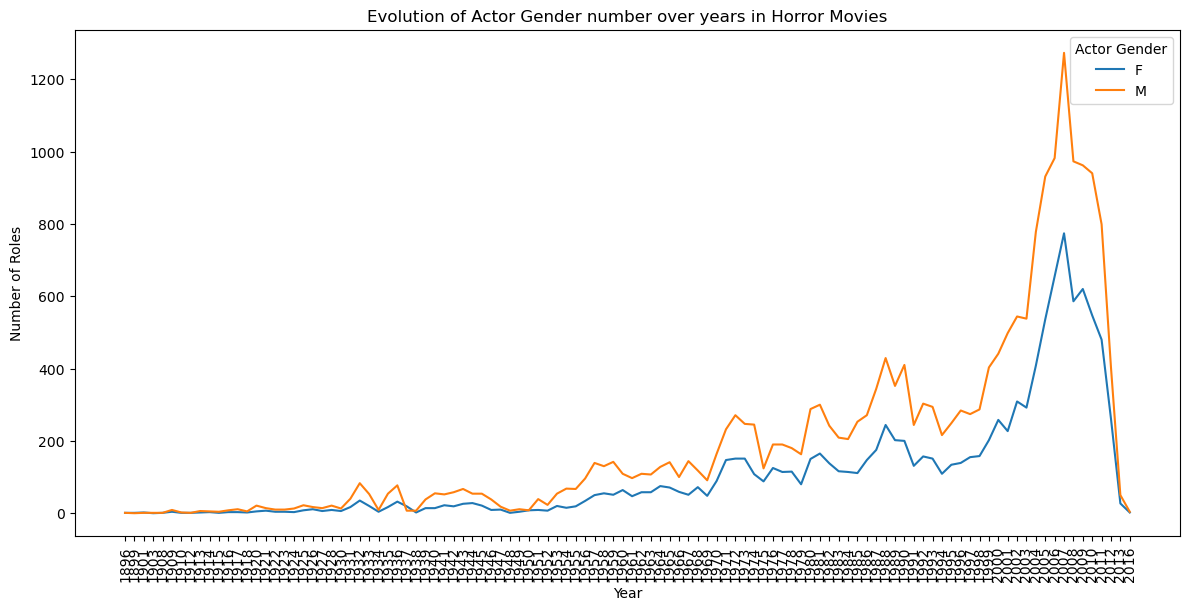

In [24]:
# plot of the nb of role per gender


gender_yearly_counts = df_merged_gender.groupby(['Movie release year', 'Actor gender']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
for gender in gender_yearly_counts.columns:
    plt.plot(gender_yearly_counts.index, gender_yearly_counts[gender], label=gender)

# Set plot titles and labels
plt.title("Evolution of Actor Gender number over years in Horror Movies")
plt.xlabel("Year")
plt.ylabel("Number of Roles")
plt.legend(title="Actor Gender")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

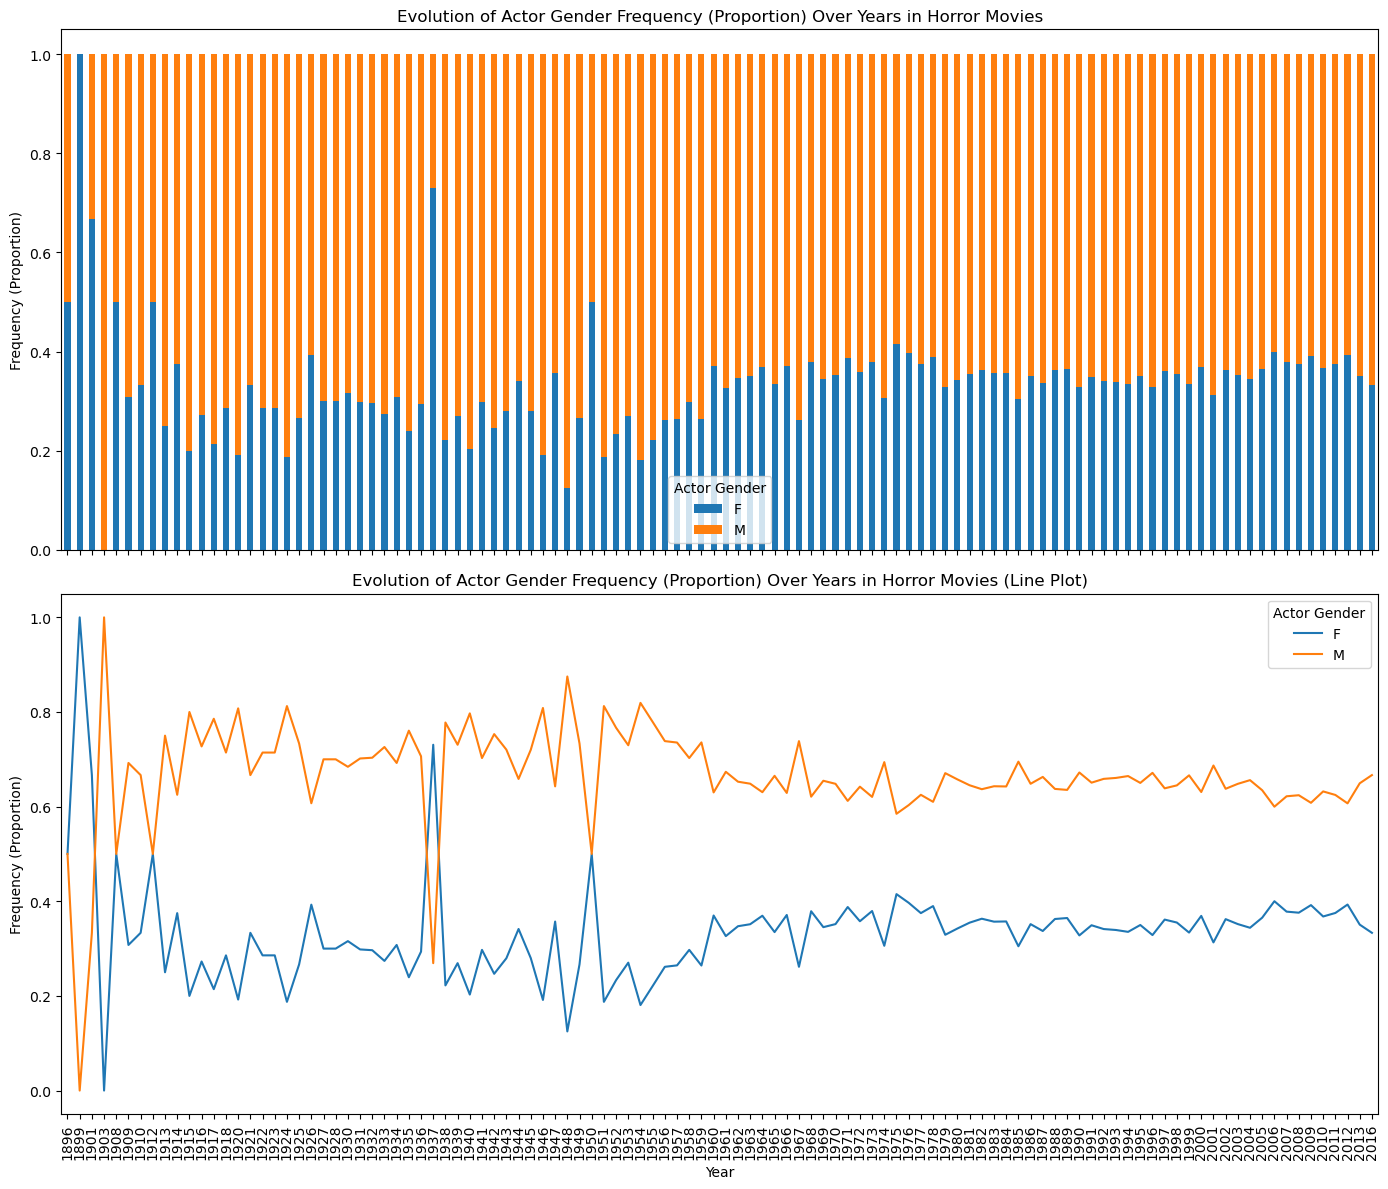

In [25]:
# Calculate the yearly frequency (proportion) of each gender
gender_yearly_counts = df_merged_gender.groupby(['Movie release year', 'Actor gender']).size().unstack(fill_value=0)
gender_yearly_frequency = gender_yearly_counts.div(gender_yearly_counts.sum(axis=1), axis=0)  # Normalize to get proportions


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# First plot: Evolution of gender frequency as stacked bar
gender_yearly_frequency.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title("Evolution of Actor Gender Frequency (Proportion) Over Years in Horror Movies")
ax1.set_ylabel("Frequency (Proportion)")
ax1.legend(title="Actor Gender")
ax1.tick_params(axis='x', rotation=90)

# Second plot: Evolution of gender frequency as line plot
for gender in gender_yearly_frequency.columns:
    ax2.plot(gender_yearly_frequency.index, gender_yearly_frequency[gender], label=gender)
    
ax2.set_title("Evolution of Actor Gender Frequency (Proportion) Over Years in Horror Movies (Line Plot)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Frequency (Proportion)")
ax2.legend(title="Actor Gender")
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## age 



The length of actor data frame is 39399 while 
the length of the NaN filtered over age dataframe 23582


Text(0, 0.5, 'Count')

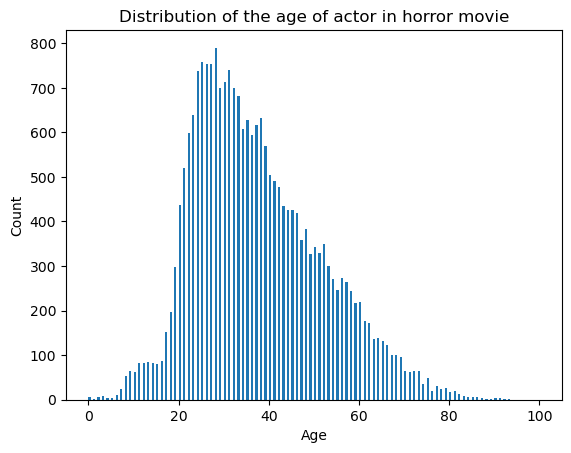

In [26]:
df_merged_age=df_merged.dropna(subset="Actor age at movie release").copy(deep=True)
print(f'The length of actor data frame is {len(df_merged)} while \nthe length of the NaN filtered over age dataframe {len(df_merged_age)}')

# Histogram of the movie runtime
plt.hist(df_merged_age["Actor age at movie release"], bins=200, range = [0,100])
plt.title("Distribution of the age of actor in horror movie")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Mean Actor Age at Movie Release')

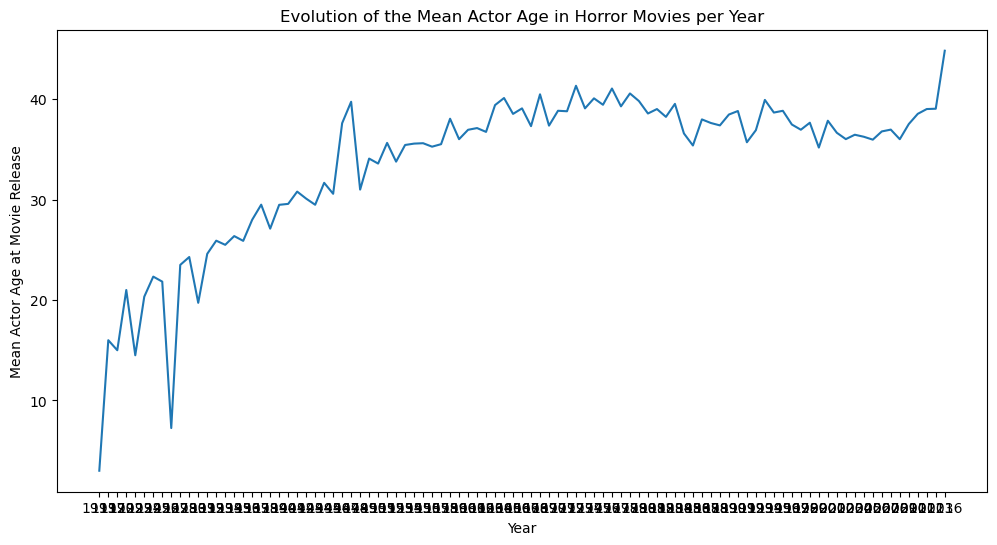

In [27]:

# Calculate the yearly mean of actor ages across all actors per year
mean_age_year = df_merged_age.groupby('Movie release year')[['Actor age at movie release']].mean()

# Plot the evolution of mean actor age per year
plt.figure(figsize=(12, 6))
plt.plot(mean_age_year.index, mean_age_year["Actor age at movie release"])
plt.title("Evolution of the Mean Actor Age in Horror Movies per Year")
plt.xlabel("Year")
plt.ylabel("Mean Actor Age at Movie Release")



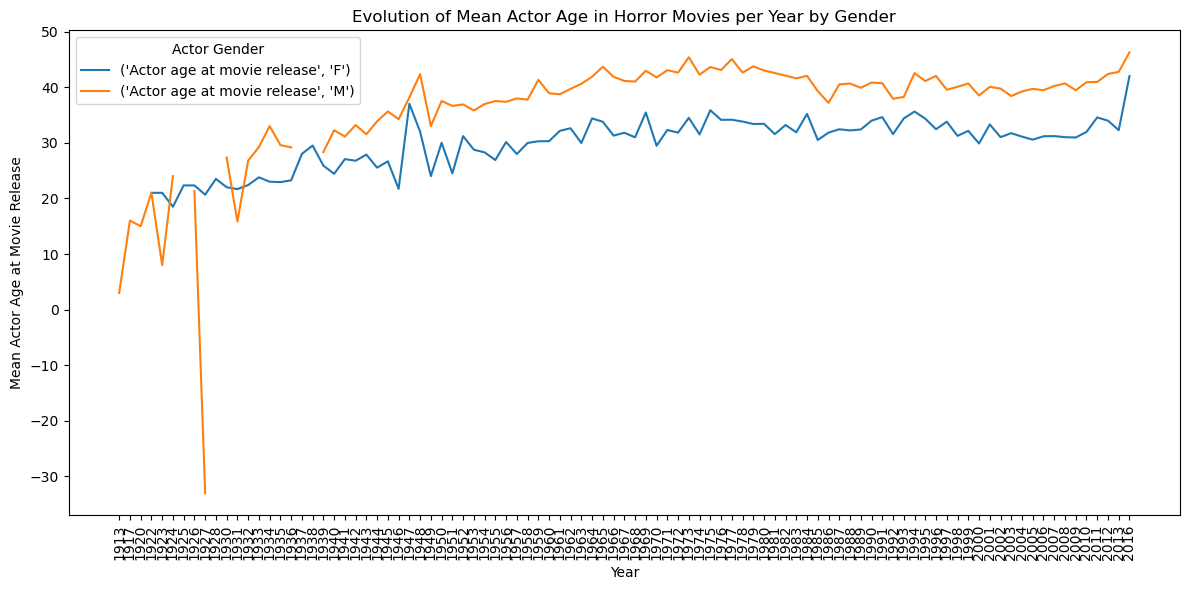

In [28]:
df_merged_age_gender=df_merged_gender.dropna(subset="Actor age at movie release").dropna(subset="Actor gender").copy(deep=True)

mean_age_year_gender = df_merged_age_gender.groupby(['Movie release year', 'Actor gender'])[['Actor age at movie release']].mean().unstack()

# Plot the evolution of mean actor age per year for both genders
plt.figure(figsize=(12, 6))
for gender in mean_age_year_gender.columns:
    plt.plot(mean_age_year_gender.index, mean_age_year_gender[gender], label=f"{gender}")

# Set plot titles and labels
plt.title("Evolution of Mean Actor Age in Horror Movies per Year by Gender")
plt.xlabel("Year")
plt.ylabel("Mean Actor Age at Movie Release")
plt.legend(title="Actor Gender")
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()